To predict whether a passenger survived or not using Logistic Regression and XGBoost Classifier

In [120]:
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Downloads\archive\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [135]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Cleaning

In [121]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
mean=df['Age'].median()
df['Age']=df['Age'].fillna(mean)
mode1=df['Cabin'].mode()[0]
df['Cabin']=df['Cabin'].fillna(mode1)

In [123]:
df.isnull().sum()
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Exploratory Data Analysis to find important features

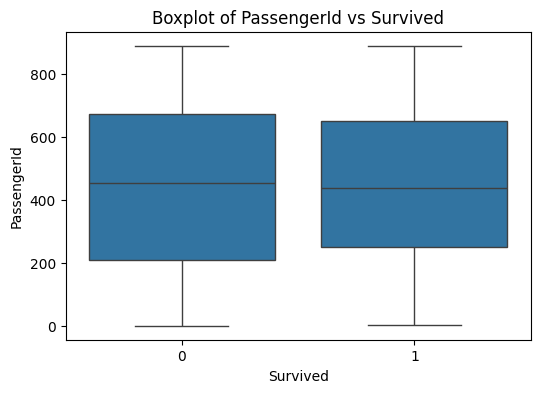

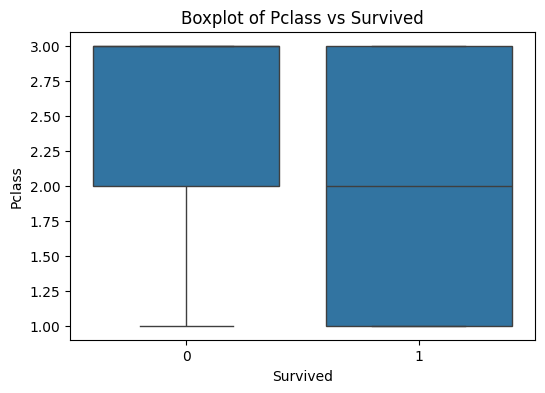

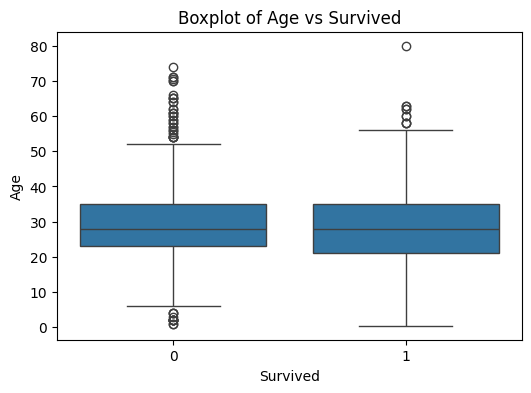

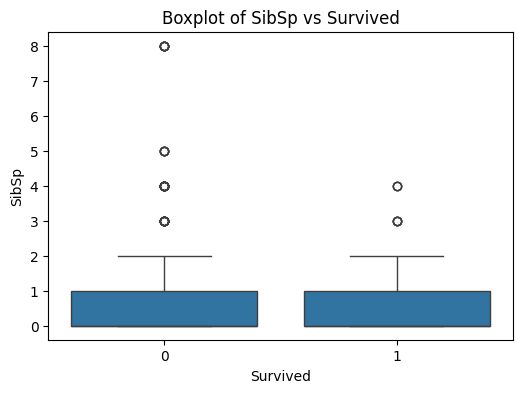

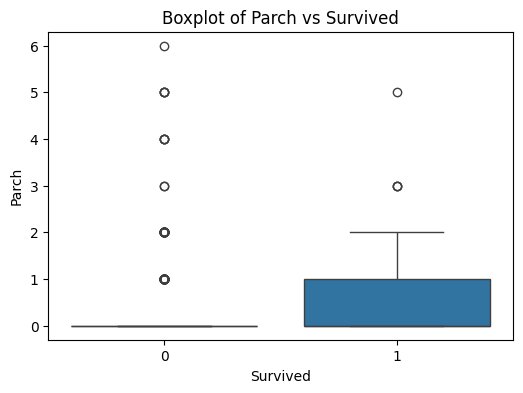

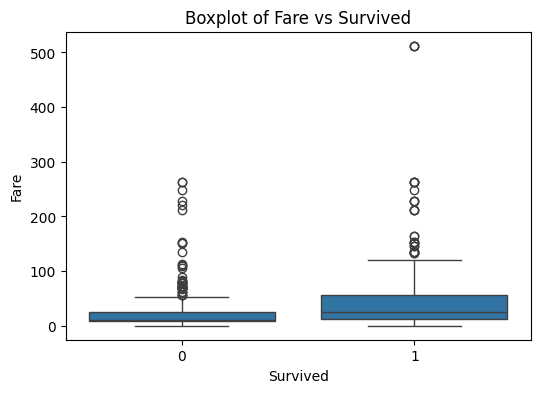

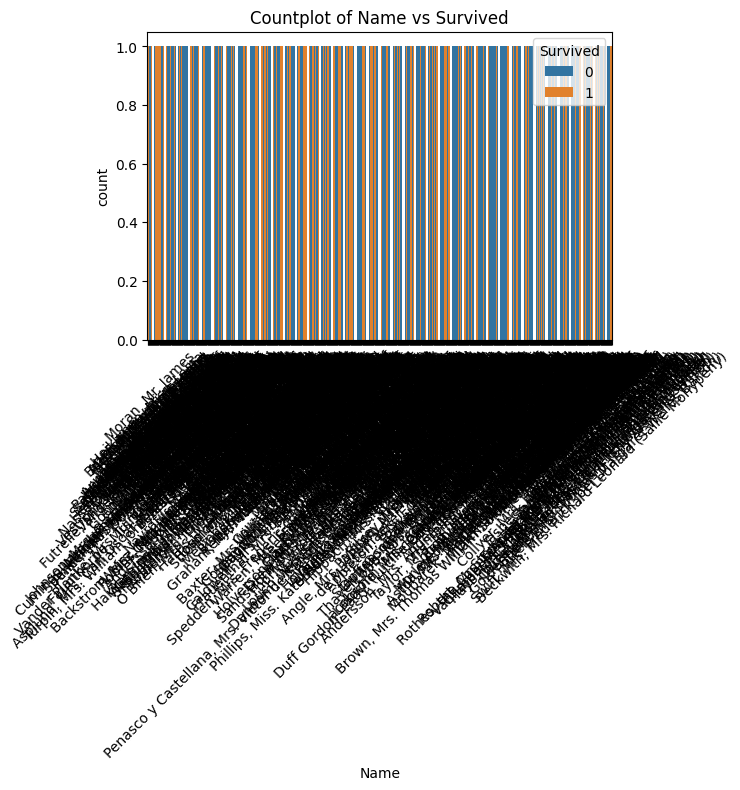

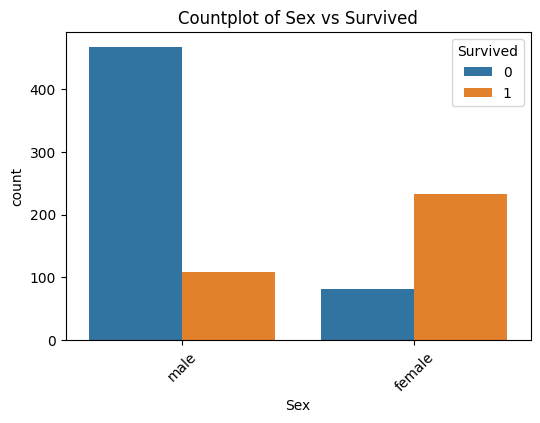

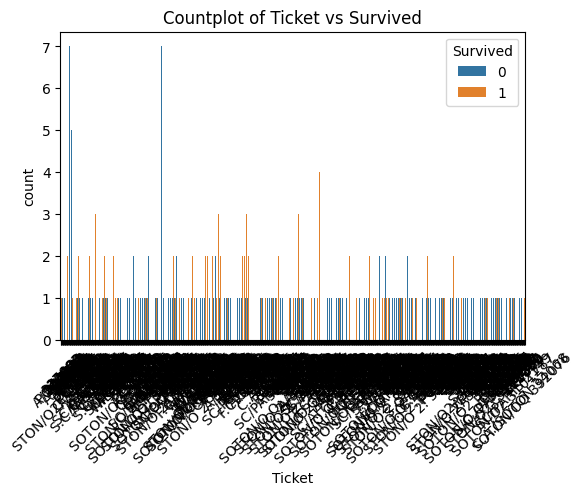

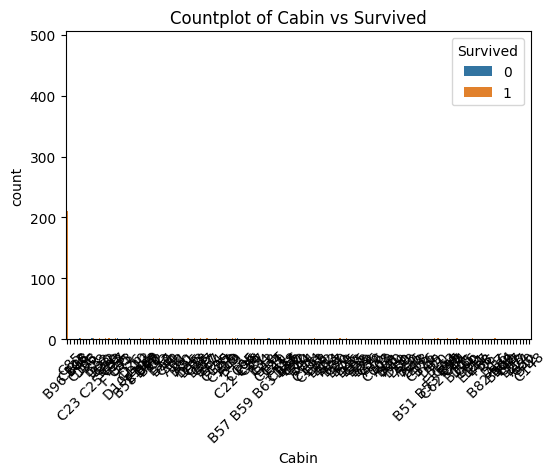

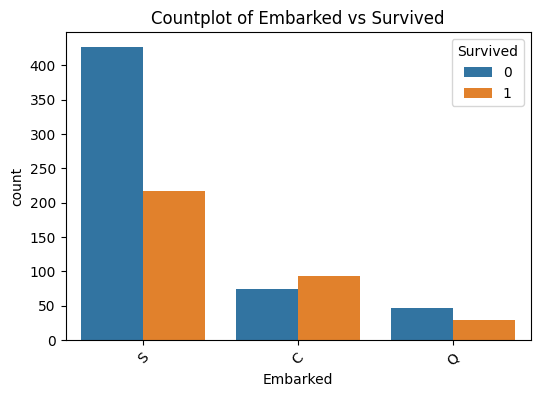

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose your dataframe is df and target column is 'target'
target = 'Survived'

# Separate numerical and categorical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# -----------------------------
# 1. Boxplots for numerical features
# -----------------------------
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'Boxplot of {col} vs {target}')
    plt.show()

# -----------------------------
# 2. Countplots for categorical features
# -----------------------------
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f'Countplot of {col} vs {target}')
    plt.xticks(rotation=45)
    plt.show()

In [125]:
# df=df.drop(columns=['PassengerId','SibSp','Name','Ticket','Cabin'])
# df

In [ ]:
df.drop(columns=['PassengerId','Name'])

Feature Engineering

In [126]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,523,7.2500,47,2
1,1,1,0,38.0,1,0,596,71.2833,81,0
2,1,3,0,26.0,0,0,669,7.9250,47,2
3,1,1,0,35.0,1,0,49,53.1000,55,2
4,0,3,1,35.0,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,47,2
887,1,1,0,19.0,0,0,14,30.0000,30,2
888,0,3,0,28.0,1,2,675,23.4500,47,2
889,1,1,1,26.0,0,0,8,30.0000,60,0


Splitting the data into training and testing

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

x=df.drop(columns=['Survived'])
y=df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,637,1,45.5,0,0,20,28.5000,56,2
733,734,2,84,1,23.0,0,0,228,13.0000,47,2
382,383,3,811,1,32.0,0,0,665,7.9250,47,2
704,705,3,326,1,26.0,1,0,398,7.8542,47,2
813,814,3,23,0,6.0,4,2,333,31.2750,47,2
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,724,0,21.0,0,0,296,7.6500,47,2
270,271,1,125,1,28.0,0,0,47,31.0000,47,2
860,861,3,325,1,41.0,2,0,399,14.1083,47,2
435,436,1,143,0,14.0,1,2,33,120.0000,47,2


Logistic Regression Model training and prediction

In [128]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

Validation

In [129]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[86, 19],
       [22, 52]], dtype=int64)

In [136]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.82      0.81       105\n           1       0.73      0.70      0.72        74\n\n    accuracy                           0.77       179\n   macro avg       0.76      0.76      0.76       179\nweighted avg       0.77      0.77      0.77       179\n'

In [130]:
accuracy_score(y_test,y_pred)

0.770949720670391

XGBoost Classifier Model training and prediction

In [131]:
import xgboost as xgb
model1=xgb.XGBClassifier()
model1.fit(x_train,y_train)
y1_pred=model1.predict(x_test)
y1_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1])

Validation

In [132]:
matrix=confusion_matrix(y_test,y1_pred)
matrix

array([[93, 12],
       [20, 54]], dtype=int64)

In [133]:
classification_report(y_test,y1_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.89      0.85       105\n           1       0.82      0.73      0.77        74\n\n    accuracy                           0.82       179\n   macro avg       0.82      0.81      0.81       179\nweighted avg       0.82      0.82      0.82       179\n'

In [134]:
accuracy_score(y_test,y1_pred)

0.8212290502793296